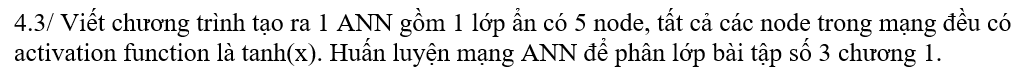

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class myann4_3:
    def __init__(self, inum, hidnum, onum):
        self.w1 = np.random.random((hidnum, inum + 1)) - .5
        self.w2 = np.random.random((onum, hidnum + 1)) - .5

    def feedforward(self, X):
        x1 = np.hstack((X, np.array([1])))
        self.x1 = x1
        a1 = self.w1 @ x1
        z1 = np.tanh(a1)

        z1 = np.hstack((z1, np.array([1])))
        self.z1 = z1

        a2 = self.w2 @ z1
        self.a2 = a2
        z2 = np.tanh(a2)
        return z2
    
    def train(self, X, t, epoch):
        lr = 0.2
        for _ in range(epoch):
            for i in range(X.shape[0]):
                input = X[i]
                y = self.feedforward(input)
                D2 = y - t[i]
                GD2 = (np.array([D2])).T @ (np.array([self.z1]))
                self.w2 =self.w2 - lr * GD2

                D1_temp = D2 @ self.w2
                d_z1 = 1 - np.tanh(self.a1) ** 2
                D1 = D1_temp * d_z1
                GD1 = D1.reshape(-1, 1) @ self.x1.reshape(1, -1)
                self.w1 -= lr * GD1

ann = myann4_3(2, 5, 1)
ann.train(X, t, 2000)


AttributeError: 'myann4_3' object has no attribute 'a1'

In [ ]:
# Vẽ đồ thị phân loại 2D
plt.figure()
for x1 in np.arange(-5, 5, 0.2):
    for x2 in np.arange(-5, 5, 0.2):
        x = np.array([x1, x2])
        out = ann.feedword(x)
        label = np.argmin(np.abs(np.array([0, 1, 2])-out)))  # Nhãn dự đoán
        plt.plot(x1, x2, color[label] + '.', markersize=5)  # Vẽ điểm dự đoán

# Vẽ các điểm huấn luyện
for i in range(X.shape[0]):
    plt.plot(X[i, 0], X[i, 1], color[t[i]] + 'o', markersize=10)  # Vẽ các điểm huấn luyện

plt.title('Perceptron Phi Tuyến')
plt.show()